In [120]:
import sklearn.linear_model as lm

In [121]:
#loading the Data

import pandas as pd

df = pd.read_csv('2014_Housing_Market_Analysis_Data_by_Zip_Code.csv' , engine='python')

df.describe() #will returns the quick stats such as count, mean, std (standard
#deviation) min, first quartile, median, third quartile, max on each column
#of the dataframe

df.cov()  #Covariance indicates how two variables are related. A positive
#covariance means the variables are positively related, while a negative
#covariance means the variables are inversely related. Drawback of covariance
#is that it does not tell you the degree of positive or negative relation

df.corr() #Correlation is another way to determine how two variables are
#related. In addition to telling you whether variables are positively or
#inversely related, correlation also tells you the degree to which the
#variables tend to move together. When you say that two items correlate, you
#are saying that the change in one item effects a change in another item. You
#ill always talk about correlation as a range between -1 and 1

df.dtypes

Zip Code                                                                         float64
Population below poverty level                                                     int64
Median household income                                                            int64
Non-White, Non-Hispanic or Latino                                                  int64
Hispanic or Latino, of any race                                                    int64
Population with disability                                                         int64
Unemployment                                                                       int64
Large households (5+ members)                                                      int64
Homes affordable to people earning less than $50,000                             float64
Rentals affordable to people earning less than $25,000                             int64
Rent-restricted units                                                              int64
Housing Choice Vouche

In [122]:
myCorr=df.corr()
myCorr

,Zip Code,Population below poverty level,Median household income,"Non-White, Non-Hispanic or Latino","Hispanic or Latino, of any race",Population with disability,Unemployment,Large households (5+ members),"Homes affordable to people earning less than $50,000","Rentals affordable to people earning less than $25,000",...,Rental units affordable to average teacher,Owner units affordable to average teacher,Rental units affordable to average tech worker,Owner units affordable to average tech worker,"Change in percentage of population below poverty, 2000-2012","Change in median rent, 2000-2012","Change in median home value, 2000-2012",Percentage of homes within 1/4-mi of transit stop,Average monthly transportation cost,Percentage of housing and transportation costs that is transportation-related
Zip Code,1.000000,-0.162301,0.092879,-0.039527,-0.145024,-0.051215,-0.402752,-0.215423,0.240109,-0.124844,...,0.194450,0.238158,0.066852,0.205648,0.016285,-0.512187,-0.058640,0.004331,-0.096373,0.159166
Population below poverty level,-0.162301,1.000000,-0.796246,0.205552,0.587313,0.289441,0.757198,0.232768,0.567512,0.622837,...,0.428272,0.591755,0.269310,0.499234,-0.323080,0.263685,-0.004765,0.568429,-0.408525,0.082770
Median household income,0.092879,-0.796246,1.000000,-0.260296,-0.652903,-0.553240,-0.736352,-0.118568,-0.624917,-0.584225,...,-0.713809,-0.620555,-0.616999,-0.695095,0.437598,-0.047587,-0.008350,-0.577613,0.417409,-0.362997
"Non-White, Non-Hispanic or Latino",-0.039527,0.205552,-0.260296,1.000000,0.135436,0.198121,0.372540,0.127109,0.411113,0.033621,...,0.197188,0.377463,0.153021,0.463326,0.112239,-0.027007,-0.051451,-0.012805,0.000819,0.289529
"Hispanic or Latino, of any race",-0.145024,0.587313,-0.652903,0.135436,1.000000,0.468693,0.647327,0.720872,0.811858,0.624703,...,0.594317,0.812507,0.392028,0.722220,-0.185222,-0.011030,-0.155203,0.179180,0.149139,0.508816
Population with disability,-0.051215,0.289441,-0.553240,0.198121,0.468693,1.000000,0.507502,0.070617,0.346770,0.589203,...,0.471081,0.324418,0.435250,0.398346,-0.492290,0.195742,0.442085,0.596231,-0.347306,0.147663
Unemployment,-0.402752,0.757198,-0.736352,0.372540,0.647327,0.507502,1.000000,0.355503,0.575568,0.591491,...,0.365674,0.577187,0.262543,0.596694,-0.250376,0.372026,-0.032690,0.437277,-0.231141,0.214114
Large households (5+ members),-0.215423,0.232768,-0.118568,0.127109,0.720872,0.070617,0.355503,1.000000,0.608847,0.298535,...,0.162184,0.622066,-0.000732,0.404682,0.194743,0.006433,-0.285936,-0.285764,0.561312,0.409063
"Homes affordable to people earning less than $50,000",0.240109,0.567512,-0.624917,0.411113,0.811858,0.346770,0.575568,0.608847,1.000000,0.333443,...,0.607300,0.994853,0.441959,0.811388,-0.130688,-0.117661,-0.343652,0.172848,0.063101,0.458473
"Rentals affordable to people earning less than $25,000",-0.124844,0.622837,-0.584225,0.033621,0.624703,0.589203,0.591491,0.298535,0.333443,1.000000,...,0.535217,0.342507,0.295644,0.340284,-0.340442,0.214065,0.276005,0.445078,-0.266447,0.227747


In [123]:
maxCorr=myCorr["Percentage of housing and transportation costs that is transportation-related"]
maxCorr

Zip Code                                                                         0.159166
Population below poverty level                                                   0.082770
Median household income                                                         -0.362997
Non-White, Non-Hispanic or Latino                                                0.289529
Hispanic or Latino, of any race                                                  0.508816
Population with disability                                                       0.147663
Unemployment                                                                     0.214114
Large households (5+ members)                                                    0.409063
Homes affordable to people earning less than $50,000                             0.458473
Rentals affordable to people earning less than $25,000                           0.227747
Rent-restricted units                                                            0.250622
Housing Ch

In [124]:
print(df.describe()["Median home value"])

count        37.000000
mean     259924.324324
std      140547.254618
min       54400.000000
25%      166200.000000
50%      233900.000000
75%      338300.000000
max      621900.000000
Name: Median home value, dtype: float64


In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
dfMain=df
df=train
print(len(test))
print(len(train))

8
29


In [126]:


x = df["Median home value"][:, np.newaxis] # this is the independent Variable
y = df["Percentage of housing and transportation costs that is transportation-related"]            # this is the dependent Variable

In [127]:
lr = lm.LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

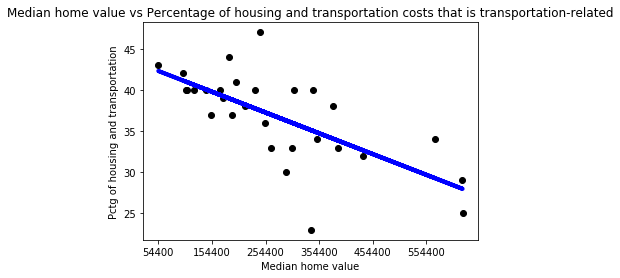

In [128]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=4)
plt.title('Median home value vs Percentage of housing and transportation costs that is transportation-related')
plt.ylabel('Pctg of housing and transportation')
plt.xlabel('Median home value')
plt.xticks(np.arange(min(x), max(x)+1, 100000))
plt.show()

In [129]:
plt.show()

In [130]:
test["predicted_value"]=lr.predict(test["Median home value"][:, np.newaxis])
test

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Zip Code,Population below poverty level,Median household income,"Non-White, Non-Hispanic or Latino","Hispanic or Latino, of any race",Population with disability,Unemployment,Large households (5+ members),"Homes affordable to people earning less than $50,000","Rentals affordable to people earning less than $25,000",...,Owner units affordable to average teacher,Rental units affordable to average tech worker,Owner units affordable to average tech worker,"Change in percentage of population below poverty, 2000-2012","Change in median rent, 2000-2012","Change in median home value, 2000-2012",Percentage of homes within 1/4-mi of transit stop,Average monthly transportation cost,Percentage of housing and transportation costs that is transportation-related,predicted_value
32,78754.0,11,53274,36,32,8,9,7,70.0,4,...,59.0,100,100.0,286,33,33,19,708,41,39.450380
24,78745.0,16,49243,7,40,11,7,6,33.0,8,...,29.0,99,96.0,73,30,83,76,668,35,39.485745
21,78741.0,40,30183,16,62,9,9,10,76.0,15,...,76.0,100,93.0,45,28,58,80,668,43,40.647714
29,78751.0,26,38624,11,14,6,9,2,11.0,13,...,10.0,97,42.0,23,38,97,98,550,40,36.302958
7,78704.0,21,50248,7,30,9,7,3,13.0,12,...,13.0,99,33.0,33,40,126,76,629,33,35.140988
31,78753.0,26,39593,20,60,10,9,16,78.0,14,...,75.0,100,98.0,128,26,40,59,708,44,40.276389
0,78726.0,9,66096,16,20,3,4,2,0.0,1,...,0.0,99,17.0,375,20,55,2,786,40,34.845443
12,78723.0,29,41869,27,46,10,10,13,33.0,22,...,28.0,99,83.0,49,28,107,84,668,43,39.225564


In [131]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [132]:
predicted,actual=test["predicted_value"],test["Percentage of housing and transportation costs that is transportation-related"]
result=pd.DataFrame({"Predicted":predicted,"Actual":actual})
result.reset_index(drop=True, inplace=True)
result

,Predicted,Actual
0,39.450380,41
1,39.485745,35
2,40.647714,43
3,36.302958,40
4,35.140988,33
5,40.276389,44
6,34.845443,40
7,39.225564,43


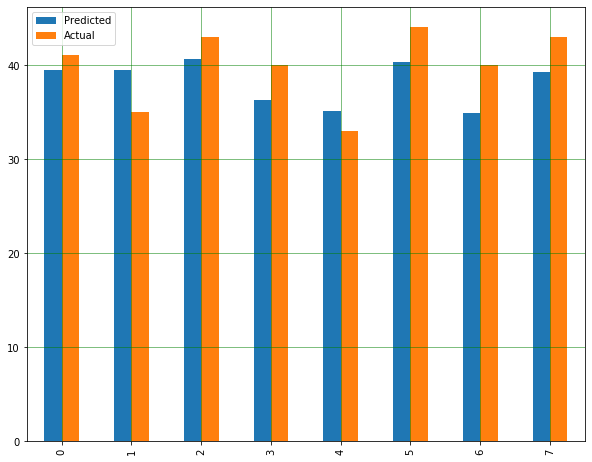

In [133]:
result.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [134]:
#Using built-in function
print ("R Squared : ", r2_score(test["Percentage of housing and transportation costs that is transportation-related"], test["predicted_value"]))
print ("Mean Absolute Error: ", mean_absolute_error(test["Percentage of housing and transportation costs that is transportation-related"], test["predicted_value"]))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test["Percentage of housing and transportation costs that is transportation-related"], test["predicted_value"])))

R Squared :  0.07242692014833918
Mean Absolute Error:  3.3597853809893987
Root Mean Squared Error:  3.552983237169322
